# Triaging Sources

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mk_target_selector.mk_db import Triage

In [4]:
db = Database_Handler(cred_id = 'sources', db = 'loganp')
db_obs = Database_Handler(cred_id = 'observations', db = 'observations')

In [5]:
tb = db.select_targets(*np.deg2rad([200, -60, 0.5]), cols='*')

In [20]:
rows = db_obs.conn.execute('SELECT source_id FROM observations.observation_status')
ids = np.unique(np.array(rows.fetchall()).ravel())

Most Important Factors
 - Pick sources that are closer to us
 - Cover the sky evenly

Decision Tree:

 1. Does the table have fewer sources than there are beams that can be formed?
     - <span style="color:green">If so, return the table.</span>
     - <span style="color:red">Go to _2_</span>
 2. Does the table have more unobserved sources than there are beams?
     - <span style="color:green">If so, observe the best sources.</span>
     - <span style="color:red">Go to _3_</span>
 3. Does the table have unobserved sources but fewer than the number of beams that can be formed?
     - <span style="color:green">If so, first use the beams to observe all of the unobserved sources, then triage the remaining.</span>
     - <span style="color:red">Go to _4_</span>
 4. Have all the sources been observed?
     - <span style="color:green">Triage sources</span>

In [28]:
obs_db = pd.DataFrame(np.arange(100), columns=['source_id'])
source_db = pd.DataFrame(np.arange(0, 200, 3), columns=['source_id'])

In [36]:
ids = triage(source_db, obs_db, 5)

In [50]:
un_obs = np.logical_not(source_db['source_id'].isin(ids))

In [33]:
def triage(source_tb, obs_tb):
    
    if source_tb.shape[0]:
        print "Nothing to see here"
        return source_tb
    
    ids = obs_tb.source_id.unique()
    obs_bool = np.logical_not(source_db['source_id'].isin(ids))
    
    if source_db[obs_bool].shape[0] > n_beams:
        return source_db[obs_bool].sort_values('dist_c', ascending=False)
    
    if source_db[obs_bool].shape[0] <= n_beams:
        tb = source_db[obs_bool]
        tb.append(triage_sources(source_db[]))
        return tb
        
    if source_db[obs_bool].shape[0] == 0:
        tb = triage_sources(source_db[])

    return tb

In [25]:
n_beams = 10

In [26]:
tb.sort_values('dist_c')['dist_c'][:n_beams]

0     71.4540
1     72.0175
2     85.7082
3    101.8200
4    103.1620
5    114.2070
6    119.6250
7    119.9490
8    120.2390
9    123.9690
Name: dist_c, dtype: float64

In [34]:
def beam_attenuation(ang_dist, fwhm):
    sig = fwhm / (2 * np.sqrt(2 * np.log(2)))
    return np.exp(- ang_dist ** 2 / (2 * sig ** 2))

def dist_attenuation(dist):
    return 1.0 / (4 * np.pi * dist ** 2)

In [37]:
arr = dist_attenuation(np.array([1,100]))

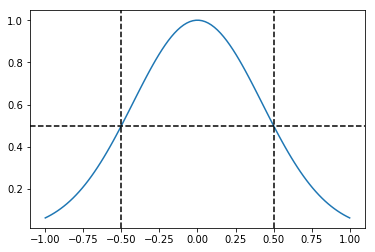

In [28]:
ang = np.linspace(-1, 1, 100)
fwhm = 1
plt.plot(ang, beam_attenuation(ang, fwhm))
plt.axhline(0.5, color='black', linestyle='--')
plt.axvline(-0.5, color='black', linestyle='--')
plt.axvline(0.5, color='black', linestyle='--')